In [1]:
# https://www.kaggle.com/neilsummers/west-nile-heatmap-by-year

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt('../../data/map1.txt')
traps = pd.read_csv('../../data/train.csv', parse_dates=['Date'])[['Date', 'Trap', 'Longitude', 'Latitude', 'WnvPresent']]

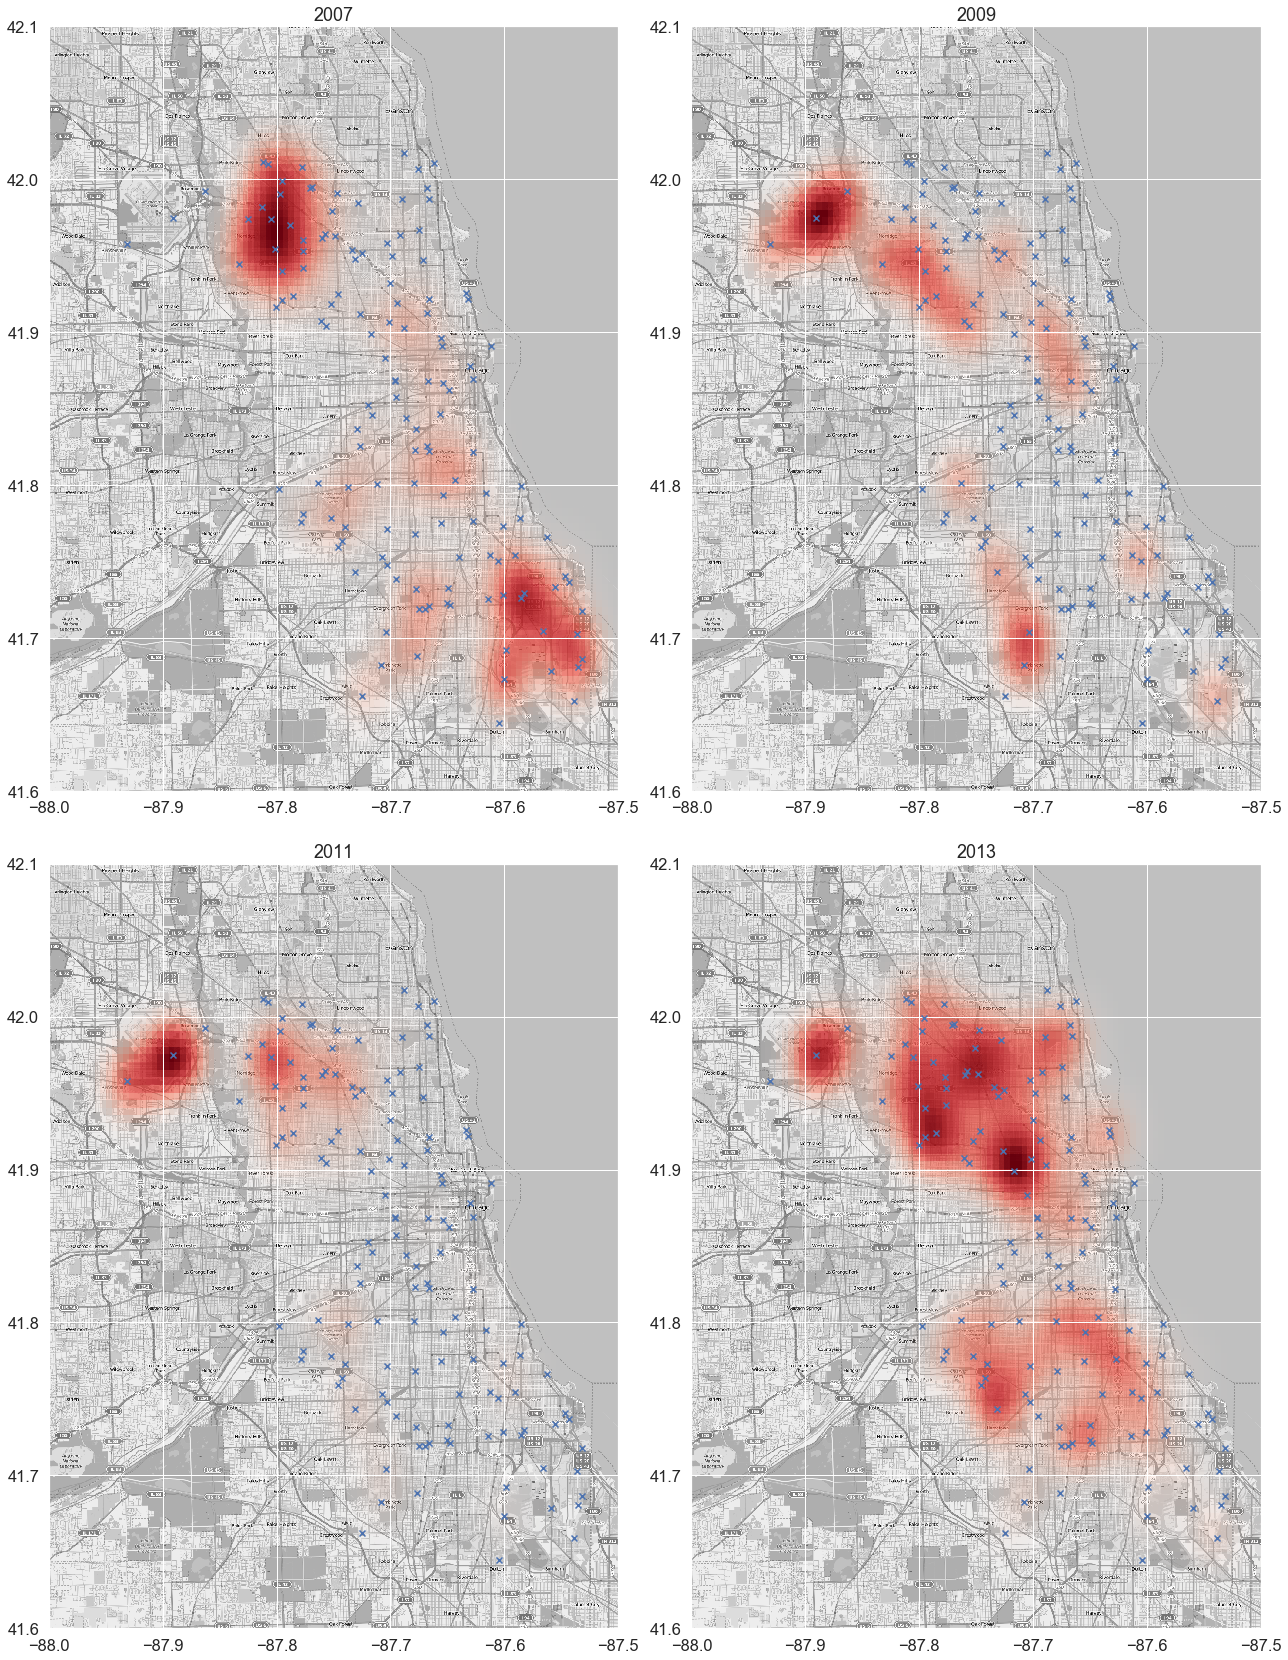

In [2]:
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = np.linspace(0, 1, alpha_cm.N)
aspect = mapdata.shape[0] / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(18,24))
for year, subplot in zip([2007, 2009, 2011, 2013], [221, 222, 223, 224]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    plt.subplot(subplot)
    plt.gca().set_title(year)
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    plt.scatter(locations[:,0], locations[:,1], marker='x')

In [3]:
alpha_cm._lut

array([[1.        , 0.96078431, 0.94117647, 0.        ],
       [0.99987697, 0.95820069, 0.93748558, 0.00392157],
       [0.99975394, 0.95561707, 0.93379469, 0.00784314],
       ...,
       [1.        , 0.96078431, 0.94117647, 1.        ],
       [0.40392157, 0.        , 0.05098039, 1.        ],
       [0.        , 0.        , 0.        , 0.        ]])